# [Sierpinski triangle](https://en.wikipedia.org/wiki/Sierpinski_triangle)  in Bokeh

* There is probably a rich color theory discussion in additive color and fractals as they apply to data science.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Sierpinski_triangle.svg/440px-Sierpinski_triangle.svg.png)

---

In [1]:
    %load_ext literacy
    o = __name__ == '__main__'; import pandas as pd; from bokeh import plotting; plotting.output_notebook()

Loading BokehJS ...

In [2]:
Begin with a simple triangle defined as line segments.

    lines = [
        [-1, 0, 0, 1],
        [0, 1, 1, 0],
        [1, -1, 0, 0],
    ]
    SIZE = len(lines)

Begin with a simple triangle defined as line segments.

    lines = [
        [-1, 0, 0, 1],
        [0, 1, 1, 0],
        [1, -1, 0, 0],
    ]
    SIZE = len(lines)

In [4]:
    __nodes__ = lambda lines: (lines[0][0::2], lines[1][0::2], lines[2][0::2])
    
__nodes__ are the corners of the triangles, for example:

    A, B, C = __nodes__(lines)
    o and print(A, B, C)
    
---

    __nodes__ = lambda lines: (lines[0][0::2], lines[1][0::2], lines[2][0::2])
    
__nodes__ are the corners of the triangles, for example:

    A, B, C = __nodes__(lines)
    o and print(A, B, C)
    
---

[-1, 0] [0, 1] [1, 0]


In [5]:
For a triangle, we derive it children __triangles__ for the __nodes__ of the *lines*.

    def __triangles__(lines):
        A, B, C = __nodes__(lines)
        X = (A[0]+B[0])/2, (A[1]+B[1])/2
        Y = (B[0]+C[0])/2, (B[1]+C[1])/2
        Z = (C[0]+A[0])/2, (C[1]+A[1])/2
        return [[_0[0], _1[0], _0[1], _1[1]] for _ in [
            [[A, X], [X, Z], [Z, A]], [[B, Y], [Y, X], [X, B]], [[C, Z], [Z, Y], [Y, C]],
        ] for _0, _1 in _]
    
---
Consider the <code>text</code> diagram below for reference to the node positions.

<code>
  B
 X Y
A Z C
</code>

---

For a triangle, we derive it children __triangles__ for the __nodes__ of the *lines*.

    def __triangles__(lines):
        A, B, C = __nodes__(lines)
        X = (A[0]+B[0])/2, (A[1]+B[1])/2
        Y = (B[0]+C[0])/2, (B[1]+C[1])/2
        Z = (C[0]+A[0])/2, (C[1]+A[1])/2
        return [[_0[0], _1[0], _0[1], _1[1]] for _ in [
            [[A, X], [X, Z], [Z, A]], [[B, Y], [Y, X], [X, B]], [[C, Z], [Z, Y], [Y, C]],
        ] for _0, _1 in _]
    
---
Consider the <code>text</code> diagram below for reference to the node positions.

<code>
  B
 X Y
A Z C
</code>

---

In [6]:
Recursively __generate__ the Sierpinsi triangles.

    #     def __generate__(levels=4):
    levels=8
    triangles = [lines]
    for LEVEL in range(levels):
        for _ in range(0, len(triangles[-1]), 3):
            _ is 0 and triangles.append([]) or triangles[-1].extend(
                __triangles__(triangles[-2][_:_+3]))

Recursively __generate__ the Sierpinsi triangles.

    #     def __generate__(levels=4):
    levels=8
    triangles = [lines]
    for LEVEL in range(levels):
        for _ in range(0, len(triangles[-1]), 3):
            _ is 0 and triangles.append([]) or triangles[-1].extend(
                __triangles__(triangles[-2][_:_+3]))

In [8]:
Create the Bokeh ColumnDataSource from the `assert triangles`

    source = pd.concat({
        _: pd.DataFrame(__, columns=['x0', 'x1', 'y0', 'y1']) for _, __ in enumerate(triangles)
    }).reset_index(-1, drop=True).pipe(plotting.ColumnDataSource)

Create the Bokeh ColumnDataSource from the `assert triangles`

    source = pd.concat({
        _: pd.DataFrame(__, columns=['x0', 'x1', 'y0', 'y1']) for _, __ in enumerate(triangles)
    }).reset_index(-1, drop=True).pipe(plotting.ColumnDataSource)

In [31]:
* Add some color and flare.

        from bokeh.models import CustomJSTransform, Tabs, Panel; p =[]
        color = {'field': 'x0',  'transform': CustomJSTransform(
            args={'source': source},
            v_func="""return [].slice.call(source.data.x0).map(function(_,i){return ['red', 'green', 'blue'][i%3]})""")}

* Add some color and flare.

        from bokeh.models import CustomJSTransform, Tabs, Panel; p =[]
        color = {'field': 'x0',  'transform': CustomJSTransform(
            args={'source': source},
            v_func="""return [].slice.call(source.data.x0).map(function(_,i){return ['red', 'green', 'blue'][i%3]})""")}

In [36]:
The first view to create verifies that we have created a Sierpinkski's triangle.

    p.append(plotting.figure(webgl=True, height=600, width=800))
    p[-1].segment('x0', 'y0', 'x1', 'y1', source=source, line_width=8, line_alpha=.3, line_color=color);

The first view to create verifies that we have created a Sierpinkski's triangle.

    p.append(plotting.figure(webgl=True, height=600, width=800))
    p[-1].segment('x0', 'y0', 'x1', 'y1', source=source, line_width=8, line_alpha=.3, line_color=color);

In [37]:
In the primary view different colored circles are placed at the nodes.  Overlapping circles with opacity variations
creates many colors in the Bokeh plot.

    p.append(plotting.figure(webgl=True, height=600, width=800))
    p[-1].circle('x1', 'y1', source=source, fill_alpha=.2, line_alpha=0,                  
                fill_color=color, size={
                    'field': 'x0',  'transform': CustomJSTransform(
                        args={'source': source},
                        v_func="""return source.data.x0.map(function(_,i){ var mul = 300, _ = source.data;
                        return Math.abs(_.y0[i] - _.y1[i])*mul || Math.abs(_.x0[i] - _.x1[i])*mul/2})"""),});

In the primary view different colored circles are placed at the nodes.  Overlapping circles with opacity variations
creates many colors in the Bokeh plot.

    p.append(plotting.figure(webgl=True, height=600, width=800))
    p[-1].circle('x1', 'y1', source=source, fill_alpha=.2, line_alpha=0,                  
                fill_color=color, size={
                    'field': 'x0',  'transform': CustomJSTransform(
                        args={'source': source},
                        v_func="""return source.data.x0.map(function(_,i){ var mul = 300, _ = source.data;
                        return Math.abs(_.y0[i] - _.y1[i])*mul || Math.abs(_.x0[i] - _.x1[i])*mul/2})"""),});

In [35]:
    plotting.show(Tabs(tabs=[Panel(child=_, title=__) for __, _ in zip(['circle', 'line'], p[::-1])]))

    plotting.show(Tabs(tabs=[Panel(child=_, title=__) for __, _ in zip(['circle', 'line'], p[::-1])]))

> A zoomed in example.

    __import__('IPython').display.Image("/Users/tonyfast/Desktop/Screen Shot 2017-07-02 at 10.16.35 AM.png", embed=True)

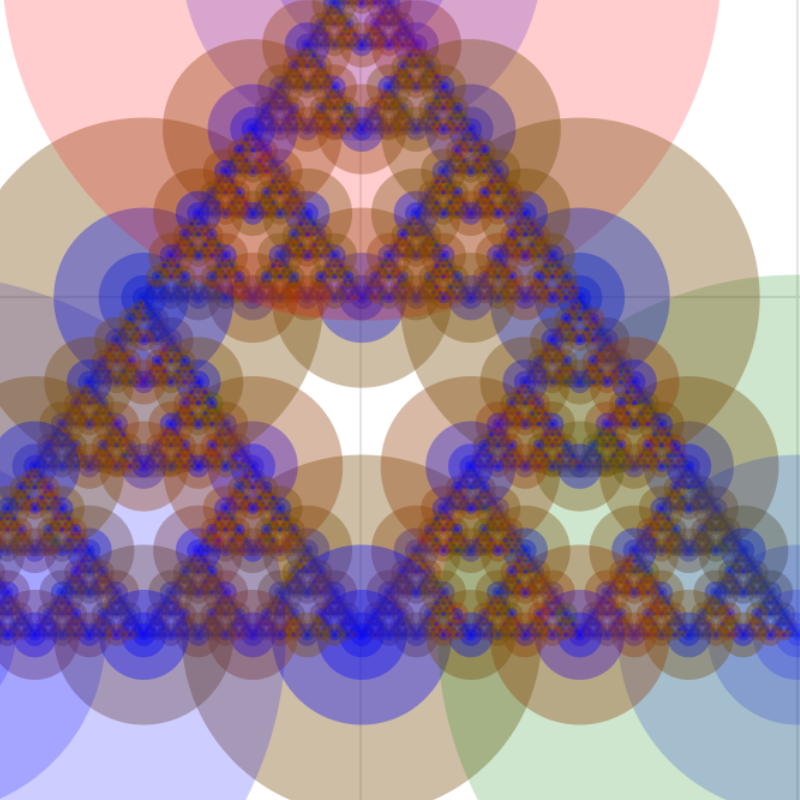

In [13]:
> A zoomed in example.

    __import__('IPython').display.Image("/Users/tonyfast/Desktop/Screen Shot 2017-07-02 at 10.16.35 AM.png", embed=True)